In [9]:
import numpy as np
from math import sqrt
import scipy
import matplotlib.pyplot as plt

### Задача №1

1.	Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [53]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [54]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [4]:
b=(np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b

2.620538882402765

In [6]:
a=np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

In [7]:
ks_hat = a+b*zp
ks_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [10]:
%matplotlib inline

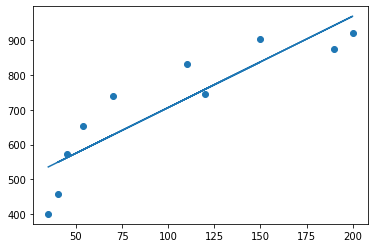

In [13]:
plt.scatter (zp, ks)
plt.plot(zp,ks_hat)
plt.show()

In [15]:
mse = ((ks-ks_hat)**2).sum()/10
mse

6470.414201176658

### Задача №2

2.	Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).


In [128]:
def mse_(B1,ks=ks, zp=zp, n=10):
    return np.sum ((B1*zp-ks)**2)/n

In [129]:
alpha = 1e-6
alpha

1e-06

In [130]:
B1=0.1
n=10

In [131]:
for i in range (3000):
    B1-=alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%500==0:
        print('Итерация:{i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Итерация:0, B1=0.25952808, mse=493237.7212546963
Итерация:500, B1=5.889815595583751, mse=56516.858416040064
Итерация:1000, B1=5.8898204201285544, mse=56516.85841571941
Итерация:1500, B1=5.889820420132673, mse=56516.85841571943
Итерация:2000, B1=5.889820420132673, mse=56516.85841571943
Итерация:2500, B1=5.889820420132673, mse=56516.85841571943


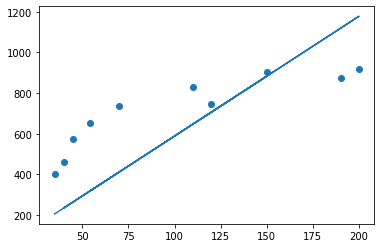

In [132]:
plt.scatter (zp, ks)
plt.plot(zp,zp*B1)
plt.show()

### Задача №3

3.	В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 


Лапласа - в случае, когда известна дисперсия генеральной совокупности, а Стьюдента - когда не известна дисперсия генеральной совокупности


### Задача №4

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [157]:
def mse1_(B1,B0,ks=ks, zp=zp, n=10):
    return np.sum ((B1*zp+B0-ks)**2)/n

In [158]:
alpha = 1e-6
alpha
alpha1=1e-2

In [159]:
B1=0.1
B0=1
n=10

In [160]:
mse_array=[]
for i in range (10000):
    B1-=alpha*(2/n)*np.sum((B1*zp+B0-ks)*zp)
    B0-=alpha1*(2/n)*np.sum(B1*zp+B0-ks)
    mse_array.append(mse_(B1,B0))
    if i%1000==0:
        print('Итерация:{i}, B1={B1}, B0={B0}, mse={mse}'.format(i=i, B1=B1, B0=B0, mse=mse_(B1, B0)))
    if len(mse_array)>2 and abs(mse_array[-1]-mse_array[-2]) < 1e-15:
        break #прервем цикл, когда значение среднеквадратичной оценки между итерациями  будет изменяться меньше, чем на 1e-15
        

Итерация:0, B1=0.25932528, B0=14.65208833216, mse=370.58412231275247
Итерация:1000, B1=2.669620506219854, B0=438.2784803367208, mse=52988.565894413994
Итерация:2000, B1=2.622570322979627, B0=443.9332085546435, mse=55721.32715523825
Итерация:3000, B1=2.620622961748482, B0=444.16725224471844, mse=55839.45183984551
Итерация:4000, B1=2.6205423623649446, B0=444.1769390849612, mse=55844.34950212938
Итерация:5000, B1=2.620539026435007, B0=444.1773400138386, mse=55844.55222632494
Итерация:6000, B1=2.6205388883641185, B0=444.1773566078942, mse=55844.56061690707
Итерация:7000, B1=2.6205388826494995, B0=444.17735729470576, mse=55844.56096418503
Итерация:8000, B1=2.6205388824129767, B0=444.17735732313236, mse=55844.56097855859
Итерация:9000, B1=2.6205388824032045, B0=444.177357324307, mse=55844.56097915252


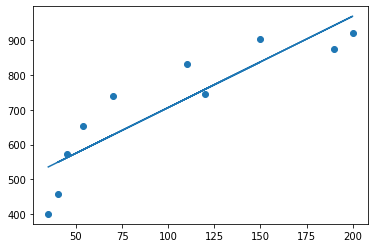

In [143]:
plt.scatter (zp, ks)
plt.plot(zp,zp*B1+B0)
plt.show()